In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/home/r4ph/desenv/exception-miner-multi/llm/new_flask_llm.csv")

In [4]:
def get_first_word_before_comma(text):
    # Find the position of the first comma
    comma_index = text.find(',')

    # If there's no comma, return -1 to indicate an invalid result
    if comma_index == -1:
        first_word = text
        first_word = first_word.replace("\n", "")
        if first_word.lower() == "yes":
            return 1
        elif first_word.lower() == "no":
            return 0
        else:
            return -1

    # Extract the substring before the comma
    first_part = text[:comma_index]

    # Split the substring to get the first word
    first_word = first_part.split()[0]

    # Check for "Yes/yes" or "No/no"
    if first_word.lower() == "yes":
        return 1
    elif first_word.lower() == "no":
        return 0
    else:
        return -1

In [19]:
df['llm_resp_binary'] = df['llm_response'].apply(get_first_word_before_comma)
#df['llm_resp_binary'] = df['llm_response'].apply(lambda x: 1 if 'yes' in x.lower() else 0)

In [21]:
df[df['llm_resp_binary'] == -1].head(2)

,file,function,func_body,str_uncaught_exceptions,n_try_except,n_try_pass,n_finally,n_generic_except,n_raise,n_captures_broad_raise,...,str_raise_identifiers,str_except_block,n_nested_try,n_bare_except,n_bare_raise_finally,str_code_without_try_except,project,prompt_type,llm_response,llm_resp_binary
91,/home/r4ph/desenv/exception-miner-multi/projec...,__delattr__,"def __delattr__(self, name: str) -> None:\n ...",NaN,1,0,0,0,1,0,...,AttributeError,raise AttributeError(name) from None,0,0,0,"def __delattr__(self, name: str) -> None:\n ...",flask,style-1-shot,\nNo. This code does not need an exception han...,-1
93,/home/r4ph/desenv/exception-miner-multi/projec...,locate_app,"def locate_app(\n module_name: str, app_nam...",NaN,1,0,0,0,2,0,...,NoAppException NoAppException,if sys.exc_info()[2].tb_next: # type: ignore[...,0,0,0,"def locate_app(\n module_name: str, app_nam...",flask,style-1-shot,\nNo. This code does not need an exception han...,-1


In [23]:
df.groupby(['n_try_except', 'llm_resp_binary']).count()

file  function  func_body  \
n_try_except llm_resp_binary                              
0            -1                 48        48         48   
              0                 61        61         61   
              1                 71        71         71   
1            -1                 53        53         53   
              0                 36        36         36   
              1                 91        91         91   

                              str_uncaught_exceptions  n_try_pass  n_finally  \
n_try_except llm_resp_binary                                                   
0            -1                                     0          48         48   
              0                                     0          61         61   
              1                                     0          71         71   
1            -1                                     0          53         53   
              0                                     0          36         36   
              1                                     0          91         91   

                              n_generic_except  n_raise  \
n_try_except llm_resp_binary                              
0            -1                             48       48   
              0                             61       61   
              1                             71       71   
1            -1                             53       53   
              0                             36       36   
              1                             91       91   

                              n_captures_broad_raise  \
n_try_except llm_resp_binary                           
0            -1                                   48   
              0                                   61   
              1                                   71   
1            -1                                   53   
              0                                   36   
              1                                   91   

                              n_captures_try_except_raise  ...  \
n_try_except llm_resp_binary                               ...   
0            -1                                        48  ...   
              0                                        61  ...   
              1                                        71  ...   
1            -1                                        53  ...   
              0                                        36  ...   
              1                                        91  ...   

                              str_except_identifiers  str_raise_identifiers  \
n_try_except llm_resp_binary                                                  
0            -1                                    0                      4   
              0                                    0                      3   
              1                                    0                      5   
1            -1                                   53                     32   
              0                                   36                     15   
              1                                   91                     41   

                              str_except_block  n_nested_try  n_bare_except  \
n_try_except llm_resp_binary                                                  
0            -1                              0            48             48   
              0                              0            61             61   
              1                              0            71             71   
1            -1                             53            53             53   
              0                             36            36             36   
              1                             91            91             91   

                              n_bare_raise_finally  \
n_try_except llm_resp_binary                         
0            -1                                 48   
              0                      

In [24]:
df_matrix = df[df['llm_resp_binary'] != -1]
df_matrix.shape

(259, 25)

In [25]:
df_matrix.head(2)

,file,function,func_body,str_uncaught_exceptions,n_try_except,n_try_pass,n_finally,n_generic_except,n_raise,n_captures_broad_raise,...,str_raise_identifiers,str_except_block,n_nested_try,n_bare_except,n_bare_raise_finally,str_code_without_try_except,project,prompt_type,llm_response,llm_resp_binary
0,/home/r4ph/desenv/exception-miner-multi/projec...,test_cli_runner,"def test_cli_runner(self, **kwargs: t.Any) -> ...",NaN,0,0,0,0,0,0,...,NaN,NaN,0,0,0,NaN,flask,style-default,\nYes,1
1,/home/r4ph/desenv/exception-miner-multi/projec...,__delattr__,"def __delattr__(self, name: str) -> None:\n ...",NaN,1,0,0,0,1,0,...,AttributeError,raise AttributeError(name) from None,0,0,0,"def __delattr__(self, name: str) -> None:\n ...",flask,style-default,\nYes,1


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_true = df_matrix['n_try_except']
y_pred = df_matrix['llm_resp_binary']

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f_measure = f1_score(y_true, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F-measure: {f_measure:.2f}")

# Optionally, display the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(cm)


Accuracy: 0.59
Precision: 0.56
Recall: 0.72
F-measure: 0.63

Confusion Matrix:
[[61 71]
 [36 91]]


In [27]:

metrics_results = []

# Evaluate metrics for each prompt type
for prompt_type in df_matrix['prompt_type'].unique():
    results = df_matrix[df_matrix['prompt_type'] == prompt_type]

    y_true = results['n_try_except']
    y_pred = results['llm_resp_binary']

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f_measure = f1_score(y_true, y_pred)

    # Store the metrics
    metrics_results.append({
        'prompt_type': prompt_type,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f_measure': f_measure
    })

    # Print metrics
    print(f"\nMetrics for {prompt_type} prompt:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F-measure: {f_measure:.2f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    print("\nConfusion Matrix:")
    print(cm)

# Convert the metrics results into a DataFrame and save to CSV
metrics_df = pd.DataFrame(metrics_results)


Metrics for style-default prompt:
Accuracy: 0.52
Precision: 0.51
Recall: 0.93
F-measure: 0.66

Confusion Matrix:
[[ 5 40]
 [ 3 42]]

Metrics for style-1-shot prompt:
Accuracy: 0.56
Precision: 0.52
Recall: 0.41
F-measure: 0.46

Confusion Matrix:
[[22 10]
 [16 11]]

Metrics for style-few-shot prompt:
Accuracy: 0.66
Precision: 0.68
Recall: 0.57
F-measure: 0.62

Confusion Matrix:
[[23  8]
 [13 17]]

Metrics for style-cot prompt:
Accuracy: 0.65
Precision: 0.62
Recall: 0.84
F-measure: 0.71

Confusion Matrix:
[[11 13]
 [ 4 21]]


In [28]:
metrics_df

,prompt_type,accuracy,precision,recall,f_measure
0,style-default,0.522222,0.512195,0.933333,0.661417
1,style-1-shot,0.559322,0.523810,0.407407,0.458333
2,style-few-shot,0.655738,0.680000,0.566667,0.618182
3,style-cot,0.653061,0.617647,0.840000,0.711864


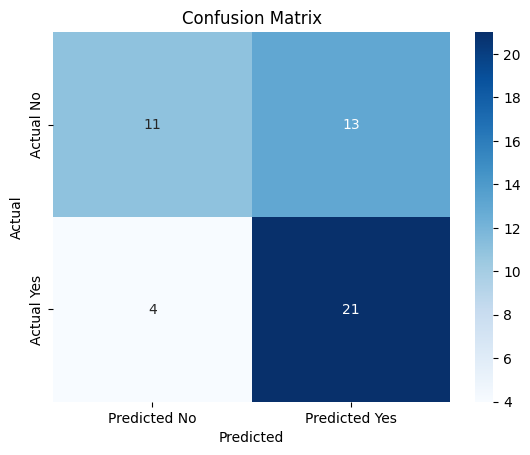

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
